In [1]:
import json
import re

import polars as pl
import seaborn as sns
import matplotlib as plt

In [2]:
with open("bench.json") as f:
    data = json.load(f)["benchmarks"]
data

[{'name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/1000000',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_MinimizeW5K15<tb::NaiveMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 8,
  'real_time': 91306652.46630087,
  'cpu_time': 91305725.5,
  'time_unit': 'ns'},
 {'name': 'BM_MinimizeW5K15<tb::DequeMinimize>/1000000',
  'family_index': 1,
  'per_family_instance_index': 0,
  'run_name': 'BM_MinimizeW5K15<tb::DequeMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 34,
  'real_time': 20466619.294465464,
  'cpu_time': 20466128.147058822,
  'time_unit': 'ns'},
 {'name': 'BM_MinimizeW5K15<tb::InplaceMinimize>/1000000',
  'family_index': 2,
  'per_family_instance_index': 0,
  'run_name': 'BM_MinimizeW5K15<tb::InplaceMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
 

In [3]:
with open("bench.json") as f:
    data = json.load(f)

df_benchmarks = pl.from_dicts(
    [
        {
            **run,
            "n_bases": int(run["name"].split("/")[1]),
            "function": re.search(r"(?<=<)(.*?)(?=>)", run["name"]).group(),
        }
        for run in data["benchmarks"]
    ]
)

df_benchmarks

name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,n_bases,function
str,i64,i64,str,str,i64,i64,i64,i64,f64,f64,str,i64,str
"""BM_MinimizeW5K15<tb::NaiveMini…",0,0,"""BM_MinimizeW5K15<tb::NaiveMini…","""iteration""",1,0,1,8,9.1307e7,9.1306e7,"""ns""",1000000,"""tb::NaiveMinimize"""
"""BM_MinimizeW5K15<tb::DequeMini…",1,0,"""BM_MinimizeW5K15<tb::DequeMini…","""iteration""",1,0,1,34,2.0467e7,2.0466e7,"""ns""",1000000,"""tb::DequeMinimize"""
"""BM_MinimizeW5K15<tb::InplaceMi…",2,0,"""BM_MinimizeW5K15<tb::InplaceMi…","""iteration""",1,0,1,35,2.0147e7,2.0147e7,"""ns""",1000000,"""tb::InplaceMinimize"""
"""BM_MinimizeW5K15<tb::RingMinim…",3,0,"""BM_MinimizeW5K15<tb::RingMinim…","""iteration""",1,0,1,31,2.2786e7,2.2785e7,"""ns""",1000000,"""tb::RingMinimize"""


In [4]:
x_ticks = df_benchmarks["n_bases"].unique().sort()
y_ticks = df_benchmarks["real_time"].unique().sort().to_numpy()

Text(0.5, 0, 'base pairs')

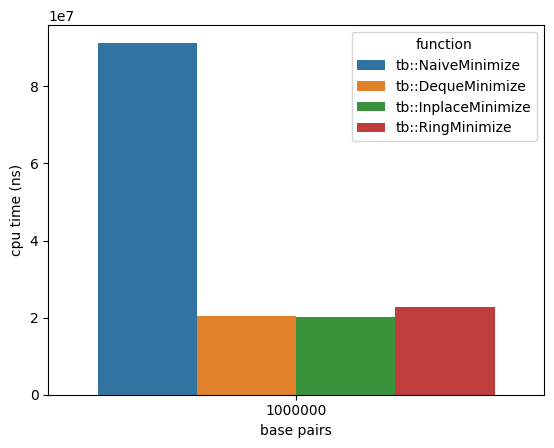

In [5]:
fig = sns.barplot(
    df_benchmarks,
    x="n_bases",
    y="cpu_time",
    hue="function",
)

fig.set_ylabel("cpu time (ns)")
fig.set_xlabel("base pairs")

In [6]:
print(
    df_benchmarks.group_by("function")
    .agg(
        (pl.col("cpu_time") / pl.col("n_bases")).first().alias("avg ns per bp"),
    )
    .sort("avg ns per bp", descending=True)
    .to_pandas()
    .to_markdown(index=False)
)

| function            |   avg ns per bp |
|:--------------------|----------------:|
| tb::NaiveMinimize   |         91.3057 |
| tb::RingMinimize    |         22.7854 |
| tb::DequeMinimize   |         20.4661 |
| tb::InplaceMinimize |         20.147  |
